# Imports

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, LogisticRegression, Lasso, Ridge
from sklearn.metrics import mean_squared_error, r2_score, accuracy_score, classification_report
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

from xgboost import XGBRegressor

## Step1: Read Dataset & Check its insights

In [2]:
df = pd.read_csv('/kaggle/input/ipcv-personal/transformed_student_data.csv')
df.head(5)

/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: invalid value encountered in greater
  has_large_values = (abs_vals > 1e6).any()
/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in less
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in greater
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: invalid value encountered in greater
  has_large_values = (abs_vals > 1e6).any()
/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in less
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.10/dist-packages/pan

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,traveltime,studytime,...,Fjob_health,Fjob_other,Fjob_services,Fjob_teacher,reason_home,reason_other,reason_reputation,guardian_mother,guardian_other,performance
0,0,0,1.038109,0,0,0,1.310216,1.540715,0.624026,0.125568,...,False,False,False,True,False,False,False,True,False,NaN
1,0,0,0.212456,0,0,1,-1.336039,-1.188832,-0.782199,0.125568,...,False,True,False,False,False,False,False,False,False,NaN
2,0,0,-1.438850,0,1,1,-1.336039,-1.188832,-0.782199,0.125568,...,False,True,False,False,False,True,False,True,False,NaN
3,0,0,-1.438850,0,0,1,1.310216,-0.278983,-0.782199,1.429466,...,False,False,True,False,True,False,False,True,False,0.0
4,0,0,-0.613197,0,0,1,0.428131,0.630866,-0.782199,0.125568,...,False,True,False,False,True,False,False,False,False,0.0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 649 entries, 0 to 648
Data columns (total 43 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   school             649 non-null    int64  
 1   sex                649 non-null    int64  
 2   age                649 non-null    float64
 3   address            649 non-null    int64  
 4   famsize            649 non-null    int64  
 5   Pstatus            649 non-null    int64  
 6   Medu               649 non-null    float64
 7   Fedu               649 non-null    float64
 8   traveltime         649 non-null    float64
 9   studytime          649 non-null    float64
 10  failures           649 non-null    float64
 11  schoolsup          649 non-null    int64  
 12  famsup             649 non-null    int64  
 13  paid               649 non-null    int64  
 14  activities         649 non-null    int64  
 15  nursery            649 non-null    int64  
 16  higher             649 non

In [4]:
# Get min and max for numeric columns
range_df = df.select_dtypes(include='number').agg(['min', 'max'])
print("Min-Max Range for Numeric Columns:")
print(range_df)

Min-Max Range for Numeric Columns:
     school  sex       age  address  famsize  Pstatus      Medu      Fedu  \
min       0    0 -1.438850        0        0        0 -2.218124 -2.098682   
max       1    1  3.515068        1        1        1  1.310216  1.540715   

     traveltime  studytime  ...  freetime     goout      Dalc      Walc  \
min   -0.782199  -1.178330  ... -1.743016 -1.859711 -0.592589 -0.997695   
max    2.733364   2.081415  ...  1.814271  1.544950  2.700136  2.119051   

       health  absences       G1        G2        G3  performance  
min -1.754987 -0.859714 -2.20663 -2.274919 -2.746156          0.0  
max  1.012903  2.814262  2.27511  2.186695  2.400904          0.0  

[2 rows x 30 columns]


In [5]:
# Get unique values for all columns
unique_values = {col: df[col].unique() for col in df.columns}
print("\nUnique values in each column:")
for col, values in unique_values.items():
    print(f"{col}: {values}")

# Get count of unique values per column
unique_counts = df.nunique()
print("\nNumber of unique values per column:")
print(unique_counts)


Unique values in each column:
school: [0 1]
sex: [0 1]
age: [ 1.03810913  0.21245616 -1.43884978 -0.61319681  1.8637621   3.51506804
  2.68941507]
address: [0 1]
famsize: [0 1]
Pstatus: [0 1]
Medu: [ 1.31021563 -1.33603938  0.42813063 -0.45395438 -2.21812439]
Fedu: [ 1.54071544 -1.18883229 -0.27898305  0.63086619 -2.09868154]
traveltime: [ 0.624026   -0.78219926  2.03025126  2.73336389]
studytime: [ 0.12556797  1.4294658  -1.17832986  2.08141472]
failures: [0.]
schoolsup: [0 1]
famsup: [0 1]
paid: [0 1]
activities: [0 1]
nursery: [0 1]
higher: [0 1]
internet: [0 1]
romantic: [0 1]
famrel: [-0.00493302  1.27567782 -1.28554385 -1.92584926]
freetime: [-0.21846427 -1.23483209  0.79790355 -1.743016    1.81427138]
goout: [ 0.69378496 -0.15738033 -1.00854562 -1.85971092  1.54495025]
Dalc: [-0.59258901  0.72450094  2.70013587  2.0415909 ]
Walc: [-0.99769466  0.56067799 -0.21850834  1.33986431  2.11905063]
health: [-0.3710422   1.01290255 -1.75498694 -1.06301457  0.32093018]
absences: [ 0.1200

## Step2: Model Fitting / Training

### Model 1: Linear Regression Training

Baseline Linear Regression: MSE = 0.10, R² = 0.90
Lasso Regression: MSE = 0.10, R² = 0.90
Linear Regression Coefficients: [0.21190587 0.75778878]
Lasso Regression Coefficients: [0.15143555 0.70781821]


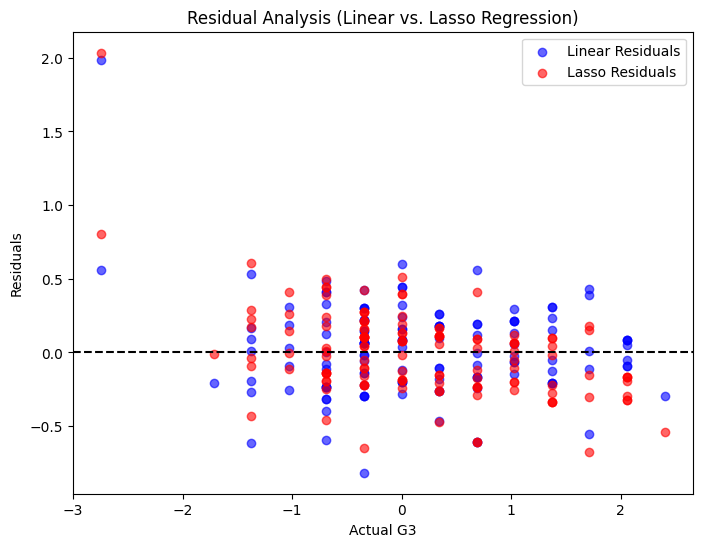

In [6]:
# Load dataset
# Assuming 'df' is your preprocessed dataset
X = df[['G1', 'G2']]  # Feature selection
y = df['G3']  # Target variable

# Split dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standard Linear Regression Model (Baseline)
lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)
y_pred = lin_reg.predict(X_test)

# Evaluate Linear Regression Model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f"Baseline Linear Regression: MSE = {mse:.2f}, R² = {r2:.2f}")

# Apply Lasso Regression for Feature Selection
lasso_reg = Lasso(alpha=0.1)  # Alpha controls regularization strength
lasso_reg.fit(X_train, y_train)
y_lasso_pred = lasso_reg.predict(X_test)

# Evaluate Lasso Regression Model
mse_lasso = mean_squared_error(y_test, y_lasso_pred)
r2_lasso = r2_score(y_test, y_lasso_pred)
print(f"Lasso Regression: MSE = {mse_lasso:.2f}, R² = {r2_lasso:.2f}")

# Compare feature importance
print("Linear Regression Coefficients:", lin_reg.coef_)
print("Lasso Regression Coefficients:", lasso_reg.coef_)

# Plot Residuals
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred - y_test, alpha=0.6, label='Linear Residuals', color='blue')
plt.scatter(y_test, y_lasso_pred - y_test, alpha=0.6, label='Lasso Residuals', color='red')
plt.axhline(y=0, color='black', linestyle='dashed')
plt.xlabel("Actual G3")
plt.ylabel("Residuals")
plt.title("Residual Analysis (Linear vs. Lasso Regression)")
plt.legend()
plt.show()

### Model 2: Polynomial Regression

In [7]:
# Polynomial Regression (degree=2)
poly_model = make_pipeline(PolynomialFeatures(degree=2), LinearRegression())
poly_model.fit(X_train, y_train)
y_poly_pred = poly_model.predict(X_test)

# Evaluate Polynomial Model
mse_poly = mean_squared_error(y_test, y_poly_pred)
r2_poly = r2_score(y_test, y_poly_pred)
print(f"Polynomial Regression (Degree=2): MSE = {mse_poly:.2f}, R² = {r2_poly:.2f}")

Polynomial Regression (Degree=2): MSE = 0.11, R² = 0.89


**Observations**
❌ Polynomial Regression (Degree=2) did not improve performance

MSE increased slightly from 0.10 → 0.11
R² decreased slightly from 0.90 → 0.89
🔍 **Conclusion**:

* The relationship between G1, G2, and G3 seems linear, so adding polynomial terms is not beneficial.
* The simplest model (Linear Regression with only G1 and G2) is still optimal.

### Model 3: Ridge Regression

In [8]:
# Train Ridge Regression model
ridge = Ridge(alpha=1.0)  # You can tune alpha
ridge.fit(X_train, y_train)

# Predictions
y_pred_ridge = ridge.predict(X_test)

# Evaluation
mse_ridge = mean_squared_error(y_test, y_pred_ridge)
r2_ridge = r2_score(y_test, y_pred_ridge)

print(f"Ridge Regression - MSE: {mse_ridge:.2f}, R²: {r2_ridge:.2f}")
print(f"Ridge Coefficients: {ridge.coef_}")


Ridge Regression - MSE: 0.10, R²: 0.90
Ridge Coefficients: [0.21611391 0.75260624]


### Model 4: Logistic Regression

In [9]:
G3_mean = df["G3"].mean()  # Approximate original mean
G3_std = df["G3"].std()    # Approximate original std
threshold_std = (0 - G3_mean) / G3_std  # Convert threshold to standardized scale

# Convert G3 into Pass (1) / Fail (0)
y_train_class = (y_train >= threshold_std).astype(int)
y_test_class = (y_test >= threshold_std).astype(int)

# Train Logistic Regression
logreg = LogisticRegression()
logreg.fit(X_train, y_train_class)

# Predictions
y_pred_logreg = logreg.predict(X_test)

# Evaluation
accuracy = accuracy_score(y_test_class, y_pred_logreg)
print(f"Logistic Regression Accuracy: {accuracy:.2f}")
print(classification_report(y_test_class, y_pred_logreg))

Logistic Regression Accuracy: 0.91
              precision    recall  f1-score   support

           0       0.93      0.90      0.92        73
           1       0.88      0.91      0.90        57

    accuracy                           0.91       130
   macro avg       0.91      0.91      0.91       130
weighted avg       0.91      0.91      0.91       130



### Model 5: XGBoost (To capture non-linearity)

In [10]:
# Train XGBoost Model
xgb_model = XGBRegressor(n_estimators=100, learning_rate=0.1, random_state=42)
xgb_model.fit(X_train, y_train)

# Predictions & Evaluation
y_xgb_pred = xgb_model.predict(X_test)
mse_xgb = mean_squared_error(y_test, y_xgb_pred)
r2_xgb = r2_score(y_test, y_xgb_pred)

print(f"XGBoost Regression: MSE = {mse_xgb:.2f}, R² = {r2_xgb:.2f}")

XGBoost Regression: MSE = 0.13, R² = 0.87


📉 **XGBoost** performed worse than Linear Regression

MSE increased from 0.10 → 0.13
R² decreased from 0.90 → 0.87
🚀 **Key Takeawa**y:

* The relationship between G1, G2, and G3 is mostly linear, so using more complex models does not help.
* Linear Regression remains the best model for predicting G3.


## Step3: Modifying Data for SVM & Random Forest

In [11]:
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

# Define Features & Target
X = df.drop(columns=["G3", "performance"])  # Drop target columns
y = (df["G3"] >= 0).astype(int)  # Convert G3 to binary classification

# Split Data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Apply SMOTE for class balancing (Only for SVM, if needed)
from imblearn.over_sampling import SMOTE
smote = SMOTE()
X_train, y_train = smote.fit_resample(X_train, y_train)

### Model 6: SVM

In [12]:
# Train SVM
svm_model = SVC(kernel="rbf", C=1, gamma="scale")
svm_model.fit(X_train, y_train)

# Predictions
y_pred_svm = svm_model.predict(X_test)

# Evaluation
print("SVM Accuracy:", accuracy_score(y_test, y_pred_svm))
print(classification_report(y_test, y_pred_svm))

SVM Accuracy: 0.9153846153846154
              precision    recall  f1-score   support

           0       0.92      0.93      0.93        75
           1       0.91      0.89      0.90        55

    accuracy                           0.92       130
   macro avg       0.91      0.91      0.91       130
weighted avg       0.92      0.92      0.92       130



### Model 7: Random Forest

In [13]:
# Train Random Forest
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Predictions
y_pred_rf = rf_model.predict(X_test)

# Evaluation
print("Random Forest Accuracy:", accuracy_score(y_test, y_pred_rf))
print(classification_report(y_test, y_pred_rf))

Random Forest Accuracy: 0.9153846153846154
              precision    recall  f1-score   support

           0       0.96      0.89      0.92        75
           1       0.87      0.95      0.90        55

    accuracy                           0.92       130
   macro avg       0.91      0.92      0.91       130
weighted avg       0.92      0.92      0.92       130



<table border="1" cellpadding="8" cellspacing="0">
    <thead>
        <tr>
            <th>Model</th>
            <th>Evaluation Metrics</th>
            <th>Remarks</th>
        </tr>
    </thead>
    <tbody>
        <tr>
            <td>Baseline Linear Regression</td>
            <td>MSE = 0.10, R² = 0.90</td>
            <td>Strong performance, simple and interpretable.</td>
        </tr>
        <tr>
            <td>Lasso Regression</td>
            <td>MSE = 0.10, R² = 0.90</td>
            <td>Feature selection effect; slightly reduces coefficients.</td>
        </tr>
        <tr>
            <td>Polynomial Regression (Degree=2)</td>
            <td>MSE = 0.11, R² = 0.89</td>
            <td>Marginally worse than linear models; possible overfitting.</td>
        </tr>
        <tr>
            <td>Ridge Regression</td>
            <td>MSE = 0.10, R² = 0.90</td>
            <td>Similar to Linear Regression but adds regularization.</td>
        </tr>
        <tr>
            <td>Logistic Regression</td>
            <td>Accuracy = 0.91<br>Precision (Class 1) = 0.88<br>Recall (Class 1) = 0.91</td>
            <td>Good classification performance, balanced precision-recall.</td>
        </tr>
        <tr>
            <td>XGBoost Regression</td>
            <td>MSE = 0.13, R² = 0.87</td>
            <td>Lower performance than linear models; may require tuning.</td>
        </tr>
        <tr>
            <td>SVM</td>
            <td>Accuracy = 0.91<br>Precision (Class 1) = 0.91<br>Recall (Class 1) = 0.87</td>
            <td>High accuracy, slight trade-off between precision & recall.</td>
        </tr>
        <tr>
            <td>Random Forest</td>
            <td>Accuracy = 0.91<br>Precision (Class 1) = 0.86<br>Recall (Class 1) = 0.93</td>
            <td>Great recall, useful when false negatives are costly.</td>
        </tr>
    </tbody>
</table>


## Step 4: Making Predictions

In [14]:
# Select a random row from the dataset (excluding target variable G3)
random_row = df.sample(n=1, random_state=42)

# Extract the true G3 value for comparison
true_G3 = random_row["G3"].values[0]

# Select only G1 and G2 as input features (same as training)
random_row_X = random_row[["G1", "G2"]]

In [15]:
# Predict G3 using Linear Regression
predicted_G3_lr = lin_reg.predict(random_row_X)[0]

# Predict G3 using Lasso Regression
predicted_G3_lasso = lasso_reg.predict(random_row_X)[0]

# Predict G3 using Polynomial Regression
predicted_G3_poly = poly_model.predict(random_row_X)[0]

# Predict G3 using Ridge Regression
predicted_G3_ridge = ridge.predict(random_row_X)[0]

# Predict G3 using XGBoost
predicted_G3_xgb = xgb_model.predict(random_row_X)[0]

# Predict Pass/Fail using Logistic Regression
predicted_pass_fail = logreg.predict(random_row_X)[0]

# Print Results
print(f"Actual G3: {true_G3}")
print(f"Predicted G3 (Linear Regression): {predicted_G3_lr:.2f}")
print(f"Predicted G3 (Lasso Regression): {predicted_G3_lasso:.2f}")
print(f"Predicted G3 (Polynomial Regression): {predicted_G3_poly:.2f}")
print(f"Predicted G3 (Ridge Regression): {predicted_G3_ridge:.2f}")
print(f"Predicted G3 (XGBoost): {predicted_G3_xgb:.2f}")
print(f"Predicted Performance (Logistic Regression - Pass/Fail): {predicted_pass_fail}")

Actual G3: 2.40090398171167
Predicted G3 (Linear Regression): 2.10
Predicted G3 (Lasso Regression): 1.86
Predicted G3 (Polynomial Regression): 1.94
Predicted G3 (Ridge Regression): 2.10
Predicted G3 (XGBoost): 1.85
Predicted Performance (Logistic Regression - Pass/Fail): 1


In [16]:
# Select a random row from the dataset (excluding target variable G3)
random_row = df.sample(n=1, random_state=42)

# Extract the true G3 value for comparison
true_G3 = random_row["G3"].values[0]

# Extract features (same as used for SVM & Random Forest training)
random_row_X_classification = random_row.drop(columns=["G3", "performance"])

In [17]:
predicted_pass_fail_svm = svm_model.predict(random_row_X_classification)[0]

# Predict using Random Forest
predicted_pass_fail_rf = rf_model.predict(random_row_X_classification)[0]

# Print Results
print(f"Actual G3: {true_G3}")
print(f"Predicted Performance (SVM - Pass/Fail): {predicted_pass_fail_svm}")
print(f"Predicted Performance (Random Forest - Pass/Fail): {predicted_pass_fail_rf}")

Actual G3: 2.40090398171167
Predicted Performance (SVM - Pass/Fail): 1
Predicted Performance (Random Forest - Pass/Fail): 1
